#**Using pure pytorch tensor datastructure to build a 3 layer neural network with ReLU activation function with auto differentiation primitives**

In [6]:
import torch 
import numpy
import math
import torch.nn as nn

In [2]:
#creating 3-d non linear data

n_samples = 200
d = 3
x = torch.FloatTensor(n_samples, d).uniform_(-1, 1)

weights_true = torch.tensor([[5, 1, 6], [1, 6, 1]]).float()
weights_true = torch.transpose(weights_true, 0, 1) #transposing to multiply in the next step
bias_true = torch.tensor([1, 1])

y_true = torch.mm((x ** 2), weights_true) + torch.mm(x, weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


###plotting the data

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_3d(x, y, y_pred=None):
  X_embedded = TSNE(n_components=2).fit_transform(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y, label='underlying function') 
  if y_pred is not None:
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y_pred, label='our function')
  plt.legend()

###Plotting both the labels in y_pred

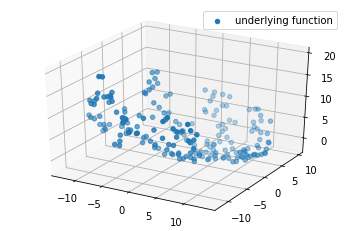

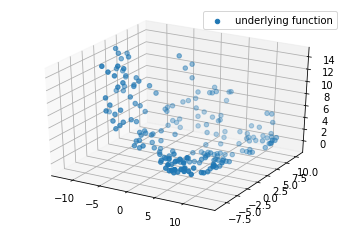

In [4]:
plot_3d(x, y_true[:, 0])
plot_3d(x, y_true[:, 1])

###Defining Linear Layer and initializing the weights, bias. 

In [16]:
class Linear(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super(Linear, self).__init__()
    self.init = torch.rand(input_dim, num_hidden).float()
    self.weights = torch.nn.Parameter(self.init, requires_grad=True) ##using Parameter to not send an empty list to optimizer step later
    self.bias = torch.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = torch.mm(x, self.weights) + self.bias
    return output

###Defining the PyTorch model by using the above defined linear layer with auto-differntiation

In [17]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = Linear(num_hidden, 10)
    self.relu2 = nn.ReLU()
    self.linear3 = Linear(10, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

###Defining the fit method and training the PyTorch model

In [20]:
from typing import Callable

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print(loss_value)
    loss_value.backward()
    optimizer.step()
  
loss = nn.MSELoss()
model = TorchModel(d, 20)

torch_fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=50)

tensor(355.6110, grad_fn=<MseLossBackward>)
tensor(105.0055, grad_fn=<MseLossBackward>)
tensor(46.6831, grad_fn=<MseLossBackward>)
tensor(29.6562, grad_fn=<MseLossBackward>)
tensor(19.8384, grad_fn=<MseLossBackward>)
tensor(13.6139, grad_fn=<MseLossBackward>)
tensor(9.8752, grad_fn=<MseLossBackward>)
tensor(7.8650, grad_fn=<MseLossBackward>)
tensor(6.8868, grad_fn=<MseLossBackward>)
tensor(6.4192, grad_fn=<MseLossBackward>)
tensor(6.1668, grad_fn=<MseLossBackward>)
tensor(5.9966, grad_fn=<MseLossBackward>)
tensor(5.8592, grad_fn=<MseLossBackward>)
tensor(5.7357, grad_fn=<MseLossBackward>)
tensor(5.6204, grad_fn=<MseLossBackward>)
tensor(5.5110, grad_fn=<MseLossBackward>)
tensor(5.4070, grad_fn=<MseLossBackward>)
tensor(5.3079, grad_fn=<MseLossBackward>)
tensor(5.2121, grad_fn=<MseLossBackward>)
tensor(5.1210, grad_fn=<MseLossBackward>)
tensor(5.0342, grad_fn=<MseLossBackward>)
tensor(4.9515, grad_fn=<MseLossBackward>)
tensor(4.8712, grad_fn=<MseLossBackward>)
tensor(4.7938, grad_fn=<Ms

###Plotting both the labels in y_pred 

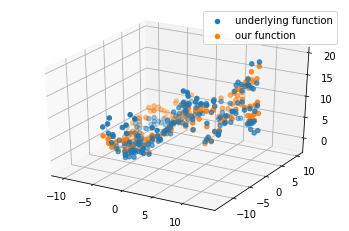

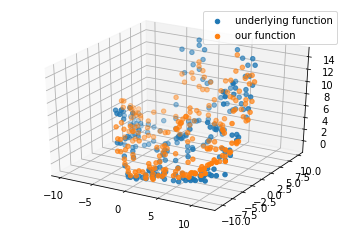

In [21]:
plot_3d(x, y_true[:, 0], model(x)[:, 0].detach().numpy()) #using detach().numpy() to unpack the y_pred tensor
plot_3d(x, y_true[:, 1], model(x)[:, 1].detach().numpy())